In [1]:
!pip install statsmodels

In [25]:
import pandas as pd

df=pd.read_csv("/content/WA_Marketing-Campaign.csv")

df.head(25)

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81
5,1,Medium,2,5,2,2,34.67
6,1,Medium,2,5,2,3,27.98
7,1,Medium,2,5,2,4,27.72
8,1,Medium,3,12,1,1,44.54
9,1,Medium,3,12,1,2,37.94


In [7]:
df.shape

(548, 7)

In [8]:
df.columns

Index(['MarketID', 'MarketSize', 'LocationID', 'AgeOfStore', 'Promotion',
       'week', 'SalesInThousands'],
      dtype='object')

In [10]:


df_ab=df[df["Promotion"].isin([1,2])].copy()

df_ab.shape

(360, 7)

In [11]:
df_ab["Promotion"].value_counts()

,count
Promotion,
2,188
1,172


In [12]:
summary = df_ab.groupby("Promotion")["SalesInThousands"].agg(
    count="count",
    mean="mean",
    std="std"
)

summary


,count,mean,std
Promotion,,,
1,172,58.099012,16.553782
2,188,47.329415,15.108955


/tmp/ipython-input-1803929513.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


{'whiskers': [<matplotlib.lines.Line2D at 0x7fb27d8d17c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb27d8d1d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb27d8d1550>,
 'medians': [<matplotlib.lines.Line2D at 0x7fb27d8d2390>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb27d8d2690>,
 'means': []}

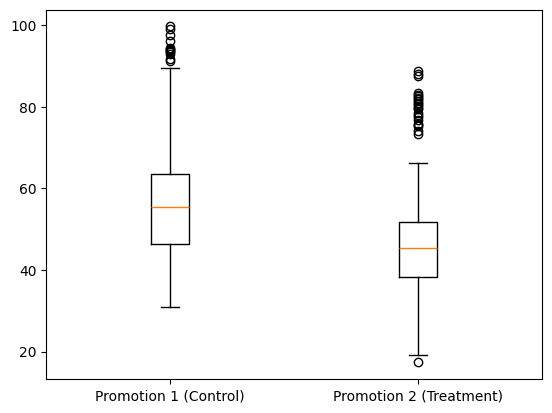

In [14]:
import matplotlib.pyplot as plt

plt.figure()
plt.boxplot(
    [df_ab[df_ab["Promotion"]==1]["SalesInThousands"],
     df_ab[df_ab["Promotion"]==2]["SalesInThousands"]],
    labels=["Promotion 1 (Control)", "Promotion 2 (Treatment)"]
)

In [19]:
summary = df_ab.groupby("Promotion")["SalesInThousands"].agg(
    count="count",
    mean="mean",
    std="std"
)

summary


,count,mean,std
Promotion,,,
1,172,58.099012,16.553782
2,188,47.329415,15.108955


In [ ]:


#Promotion 1 (Control)

#Mean sales: 58.10

#Std dev: 16.55

#n = 172

#Promotion 2 (Control)

#Mean sales: 47.33

#Std dev: 15.11

#n = 188

#Initial Insight (before statistics)
# Promotion 1 has much higher average weekly sales than Promotion 2
#Difference ≈ 10.77 thousand units



In [ ]:
# H0 (Null Hypothesis):
# There is no difference in mean weekly sales between Promotion 1 and Promotion 2.

# H1 (Alternative Hypothesis):
## There is a significant difference in mean weekly sales between Promotion 1 and Promotion 2.


In [21]:
from scipy.stats import ttest_ind

promo1 = df_ab[df_ab["Promotion"] == 1]["SalesInThousands"]
promo2 = df_ab[df_ab["Promotion"] == 2]["SalesInThousands"]

t_stat, p_value = ttest_ind(promo1, promo2, equal_var=False)

t_stat, p_value

(np.float64(6.42752867090748), np.float64(4.2903687179871785e-10))

In [22]:
alpha = 0.05

if p_value < alpha:
    print("Reject H0 → Statistically significant difference in sales.")
else:
    print("Fail to reject H0 → No statistically significant difference.")


Reject H0 → Statistically significant difference in sales.


In [23]:
mean_diff = promo2.mean() - promo1.mean()
percent_lift = (mean_diff / promo1.mean()) * 100

mean_diff, percent_lift


(np.float64(-10.76959673428997), np.float64(-18.536626411587623))

In [24]:
#Explanation


'''
tatistical Results

t-statistic: 6.43

p-value: 4.29 × 10⁻¹⁰ (≈ 0.000000000429)

Decision:

Reject H₀ (Null Hypothesis)
The difference in sales between promotions is statistically significant.

Effect Size (Business Impact)

Mean difference (Promotion 2 − Promotion 1):
−10.77 (thousand units)

Percent lift:  −18.54%
'''

#Promotion 2 generates about 18.5% lower weekly sales than Promotion 1.

#  This is a large and meaningful effect, not just a statistical one #

'''
I ran an A/B test comparing two promotions using a two-sample t-test.
The results showed a statistically significant difference,
with Promotion 1 outperforming Promotion 2 by about 18.5% in weekly sales,
so I recommended Promotion 1 for rollout.

'''

'\nI ran an A/B test comparing two promotions using a two-sample t-test. \nThe results showed a statistically significant difference, \nwith Promotion 1 outperforming Promotion 2 by about 18.5% in weekly sales,\nso I recommended Promotion 1 for rollout.\n\n'

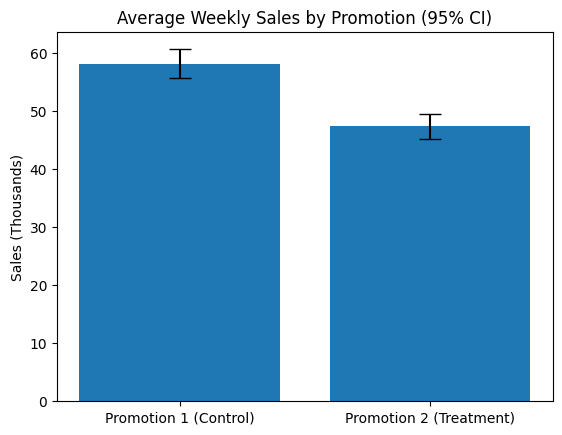

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Calculate means
means = df_ab.groupby("Promotion")["SalesInThousands"].mean()

# 95% confidence intervals
cis = []
for promo in [1, 2]:
    data = df_ab[df_ab["Promotion"] == promo]["SalesInThousands"]
    ci = stats.t.interval(
        0.95,
        len(data)-1,
        loc=np.mean(data),
        scale=stats.sem(data)
    )
    cis.append(ci)

# Error bars
errors = [
    means[1] - cis[0][0],
    means[2] - cis[1][0]
]

plt.figure()
plt.bar(
    ["Promotion 1 (Control)", "Promotion 2 (Treatment)"],
    means.values,
    yerr=errors,
    capsize=8
)
plt.title("Average Weekly Sales by Promotion (95% CI)")
plt.ylabel("Sales (Thousands)")
plt.show()
